In [1]:

import sys
sys.path.append("../")
from preprocessing.create_train_test_dicts import build_splits

ds = build_splits()
train_split = ds['train_numeric']
val_split = ds['val_numeric']
test_split = ds['test_numeric']


In [2]:
from preprocessing.svm_pipeline_libsvm import SVCParamSearch
from sklearn.metrics import accuracy_score, f1_score

metrics = {
    "accuracy": accuracy_score,
    "f1_weighted": lambda y_true, y_pred: f1_score(y_true, y_pred, average="weighted"),
}

search = SVCParamSearch(
    train_dict=train_split,
    val_dict=val_split,
    pca_dims=[70,80,90],
    C_values=[5,7,9],
    gamma_values=[0.0018,0.0015,0.0012],
)

results = search.run()


Evaluating: PCA=70, kernel=rbf, C=5, gamma=0.0018
Fitting SVC pipeline:  C=5, gamma=0.0018, n_components=70
  Train size: 21529
  Feature dim after PCA: 70
  Training SVC...
  SVC training complete.
  [Going SVC] PCA=70, kernel=rbf, C=5, gamma=0.0018
  Val size: 7180
  Predictions done.
  Results: accuracy=0.4664345403899721, f1_weighted=0.4633939686802197

Evaluating: PCA=70, kernel=rbf, C=5, gamma=0.0015
Fitting SVC pipeline:  C=5, gamma=0.0015, n_components=70
  Train size: 21529
  Feature dim after PCA: 70
  Training SVC...
  SVC training complete.
  [Going SVC] PCA=70, kernel=rbf, C=5, gamma=0.0015
  Val size: 7180
  Predictions done.
  Results: accuracy=0.4732590529247911, f1_weighted=0.47138223305665417

Evaluating: PCA=70, kernel=rbf, C=5, gamma=0.0012
Fitting SVC pipeline:  C=5, gamma=0.0012, n_components=70
  Train size: 21529
  Feature dim after PCA: 70
  Training SVC...
  SVC training complete.
  [Going SVC] PCA=70, kernel=rbf, C=5, gamma=0.0012
  Val size: 7180
  Predictio

In [3]:

import pandas as pd
df = pd.DataFrame(results)
df


,pca_dim,kernel,C,gamma,accuracy,f1_weighted
0,70,rbf,5,0.0018,0.466435,0.463394
1,70,rbf,5,0.0015,0.473259,0.471382
2,70,rbf,5,0.0012,0.470056,0.468981
3,70,rbf,7,0.0018,0.465181,0.462173
4,70,rbf,7,0.0015,0.471866,0.470423
5,70,rbf,7,0.0012,0.469220,0.468631
6,70,rbf,9,0.0018,0.464345,0.461389
7,70,rbf,9,0.0015,0.468384,0.467112
8,70,rbf,9,0.0012,0.467549,0.467293
9,80,rbf,5,0.0018,0.471448,0.468041


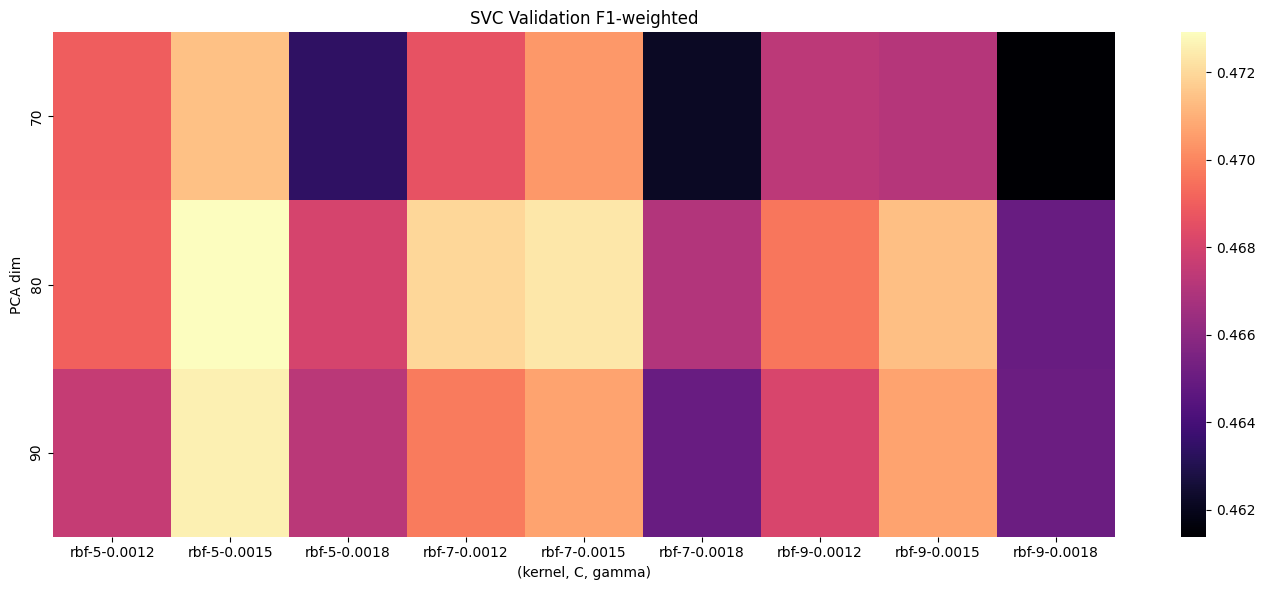

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap for F1 across kernels/params (flattened columns)
pivot_f1 = df.pivot_table(index="pca_dim", columns=["kernel", "C", "gamma"], values="f1_weighted")
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_f1, annot=False, cmap="magma")
plt.title("SVC Validation F1-weighted")
plt.xlabel("(kernel, C, gamma)")
plt.ylabel("PCA dim")
plt.tight_layout()
plt.show()


Best by f1_weighted: PCA=80, kernel=rbf, C=5, gamma=0.0015, score=0.4729
Fitting SVC pipeline:  C=5, gamma=0.0015, n_components=80
  Train size: 28709
  Feature dim after PCA: 80
  Training SVC...
  SVC training complete.
[Final SVC] PCA=80, kernel=rbf, C=5, gamma=0.0015
Train+Val size: 28709, Test size: 7178


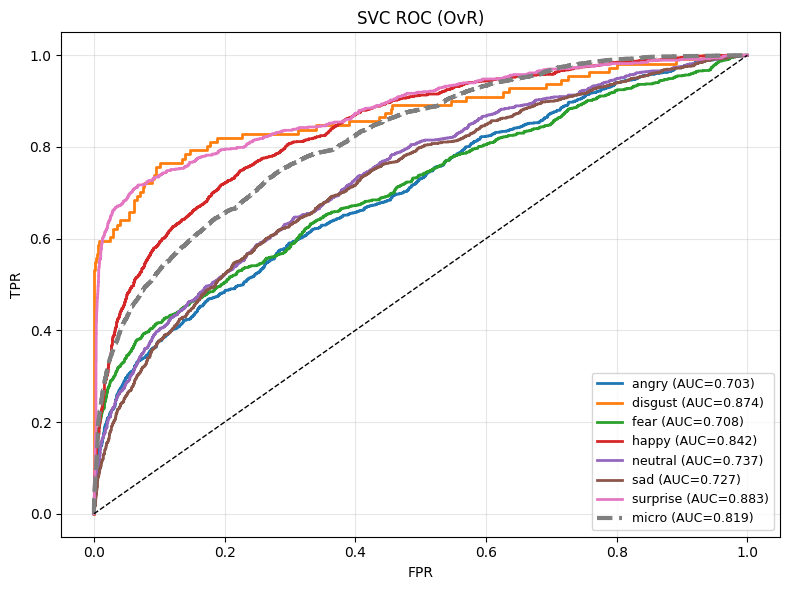

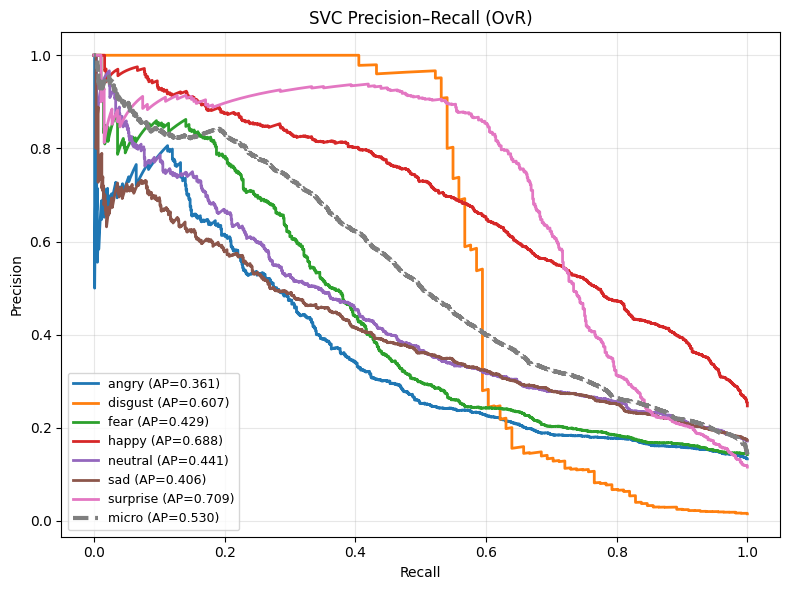

In [5]:

# Train best model on train+val, evaluate on test
svc_final, scaler_final, pca_final, X_test, y_test, y_score, class_names = search.train_best_model(
    results,
    test_dict=test_split,
    metric_name="f1_weighted",
)

# ROC & PR curves
SVCParamSearch.plot_roc(y_test, y_score, class_names)
SVCParamSearch.plot_pr(y_test, y_score, class_names)


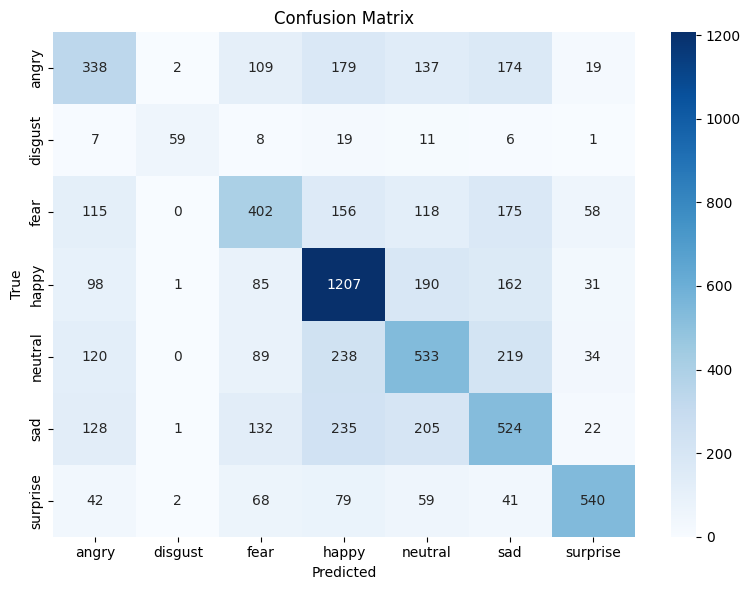

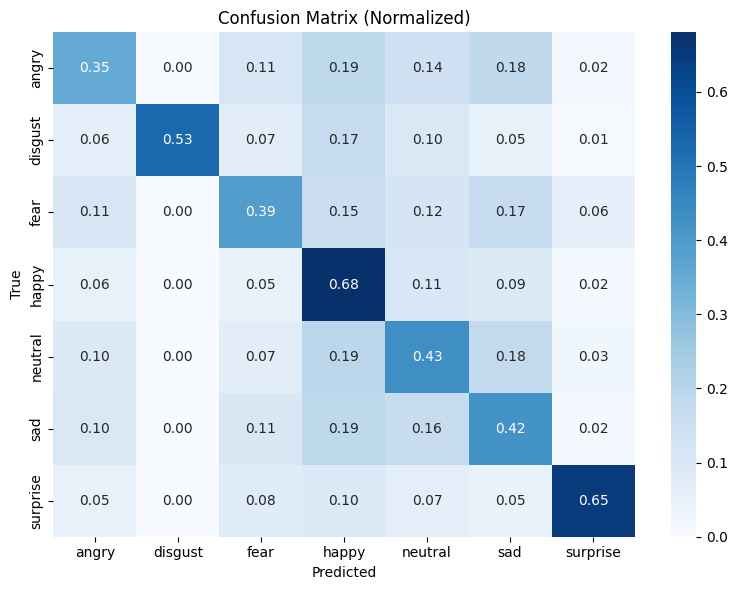

{'accuracy': np.float64(0.5019504040122597),
 'precision_per_class': array([0.39858491, 0.90769231, 0.45016797, 0.57122575, 0.42537909,
        0.4027671 , 0.76595745]),
 'recall_per_class': array([0.35281837, 0.53153153, 0.39257812, 0.68038331, 0.43227899,
        0.4202085 , 0.64981949]),
 'f1_per_class': array([0.37430786, 0.67045455, 0.41940532, 0.62104451, 0.42880129,
        0.41130298, 0.703125  ]),
 'macro_precision': np.float64(0.5602535101548309),
 'macro_recall': np.float64(0.4942311902844345),
 'macro_f1': np.float64(0.5183487866029038)}

In [6]:

# Confusion matrices and metrics
from sklearn.metrics import confusion_matrix
from scripts.metrics_from_cm import metrics_from_confusion_matrix

y_pred = svc_final.predict(X_test)
SVCParamSearch.plot_cm(y_test, y_pred, class_names)
SVCParamSearch.plot_cm(y_test, y_pred, class_names, normalize=True, title="Confusion Matrix (Normalized)")

cm = confusion_matrix(y_test, y_pred, labels=class_names)
metrics_from_cm = metrics_from_confusion_matrix(cm)
metrics_from_cm
